General_Health:
1=>poor
2=>fair
3=>excellent
4=>good
5=>very good

Exercise,	Heart_Disease,	Skin_Cancer,	Other_Cancer,	Depression,	Diabetes,	Arthritis, Smoking_History:
1=>No
2=>Yes

Gender:
1=>Female
2=>Male

Age_Category:
18-24=>1
25-29=>2
30-34=>3
35-39=>4
40-44=>5
45-49=>6
50-54=>7
55-59=>8
60-64=>9
65-69=>10
70-74=>11
75-79=>12
80+=>13

# VERİ YÜKLEME VE İNCELEME

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('CVD_cleaned.csv')
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Gender,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
data.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Gender,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,"Very Good,5 or more years ago,Yes,No,No,No,Yes...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [ ]:
data.shape

(308854, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Gender                        299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299312 non-null  float64
 12  Weight_(kg)                   299312 non-nul

In [ ]:
data.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Gender                           object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

# EKSİK VERİLERİ BELİRLEME VE DOLDURMA


veri kaybını önlemek amacıyla sayısal değişkenleri ortalama ile kategorik değişkenleri mod ile doldurdum

In [ ]:
data.isnull().sum()

General_Health                     0
Checkup                         9542
Exercise                        9542
Heart_Disease                   9542
Skin_Cancer                     9542
Other_Cancer                    9542
Depression                      9542
Diabetes                        9542
Arthritis                       9542
Gender                          9542
Age_Category                    9542
Height_(cm)                     9542
Weight_(kg)                     9542
BMI                             9542
Smoking_History                 9542
Alcohol_Consumption             9542
Fruit_Consumption               9542
Green_Vegetables_Consumption    9542
FriedPotato_Consumption         9542
dtype: int64

<Axes: >

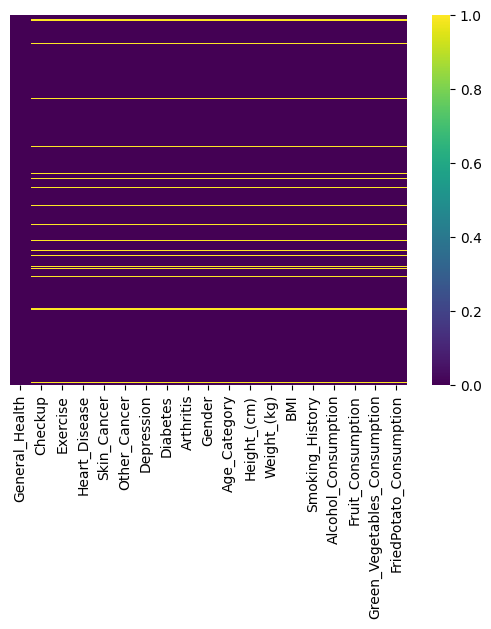

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis")

In [ ]:
#Kategorik Değişkenleri İnceleme
df = pd.DataFrame(data)
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")


General_Health: ['Poor' 'Very Good' 'Good' ...
 'Fair,Within the past 2 years,Yes,No,No,No,No,"No, pre-diabetes or borderline diabetes",No,Female,25-29,170.0,117.48,40.56,No,4.0,6.0,2.0,5.0'
 'Very Good,Within the past year,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Female,40-44,163.0,72.57,27.46,No,0.0,12.0,16.0,3.0'
 'Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0']
Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 nan 'Within the past 5 years' 'Never']
Exercise: ['No' 'Yes' nan]
Heart_Disease: ['No' 'Yes' nan]
Skin_Cancer: ['No' 'Yes' nan]
Other_Cancer: ['No' 'Yes' nan]
Depression: ['No' 'Yes' nan]
Diabetes: ['No' 'Yes' nan]
Arthritis: ['Yes' 'No' nan]
Gender: ['Female' 'Male' nan]
Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' nan '35-39' '40-44' '25-29']
Smoking_History: ['Yes' 'No' n

In [ ]:
#Eksik Verileri Doldurma:
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
#Sayısal Değişkenleri İnceleme ve Doldurma:
numeric_columns = df.select_dtypes(include=['float64']).columns

for column in numeric_columns:
    # ortalamayla doldur
    df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Gender                          0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [ ]:
data.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Gender                           object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

# **LOJİSTİK REGRESYON**

öncelikle kategorik değişkenlerle devam edebilmek için onları dummy değişkenine çeviriyorum dummy değişkeni kategorik değişkenin her bir kategorisinin varlığını veya yokluğunu temsil eder. Bu, orijinal kategorik değişkenin ikili bir formunu modellemeyi mümkün kılar.

In [ ]:
Heart_Disease = pd.get_dummies(data["Heart_Disease"], drop_first=True)

In [ ]:
Heart_Disease.head() #burada 0 değeri no 1 değeri yes

,Yes
0,0
1,1
2,0
3,1
4,0


In [ ]:
data.Checkup.value_counts()

Within the past year       241062
Within the past 2 years     36167
Within the past 5 years     17020
5 or more years ago         13215
Never                        1390
Name: Checkup, dtype: int64

In [ ]:
Checkup=pd.get_dummies(data["Checkup"], drop_first=True)
Checkup.head(100)

,Never,Within the past 2 years,Within the past 5 years,Within the past year
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
95,0,0,0,1
96,0,0,0,1
97,0,1,0,0
98,0,0,0,1


In [ ]:
Exercise=pd.get_dummies(data["Exercise"], drop_first=True)
General_Health=pd.get_dummies(data["General_Health"], drop_first=True)
Skin_Cancer=pd.get_dummies(data["Skin_Cancer"], drop_first=True)
Other_Cancer=pd.get_dummies(data["Other_Cancer"], drop_first=True)
Depression=pd.get_dummies(data["Depression"], drop_first=True)
Diabetes=pd.get_dummies(data["Diabetes"], drop_first=True)
Arthritis=pd.get_dummies(data["Arthritis"], drop_first=True)
Gender=pd.get_dummies(data["Gender"], drop_first=True)
Age_Category=pd.get_dummies(data["Age_Category"], drop_first=True)
Smoking_History=pd.get_dummies(data["Smoking_History"], drop_first=True)

In [ ]:
data.drop([General_Health, Checkup, Exercise, Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, Gender, Age_Category, Smoking_History], axis=1, inplace=True)